**IMPORTING BASIC LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np 

**MOUNTING THE DRIVE**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/DATASET/data.csv')
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [ ]:
df = df.rename(columns={'Body': 'text'}, index={'ONE': 'Row_1'})
df = df.rename(columns={'Label': 'label'}, index={'ONE': 'Row_1'})
df.head()

,URLs,Headline,text,label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


**PLOTTING A WORD CLOUD(to get an idea about the frequent words)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
""
%matplotlib inline
sns.set_style("darkgrid")

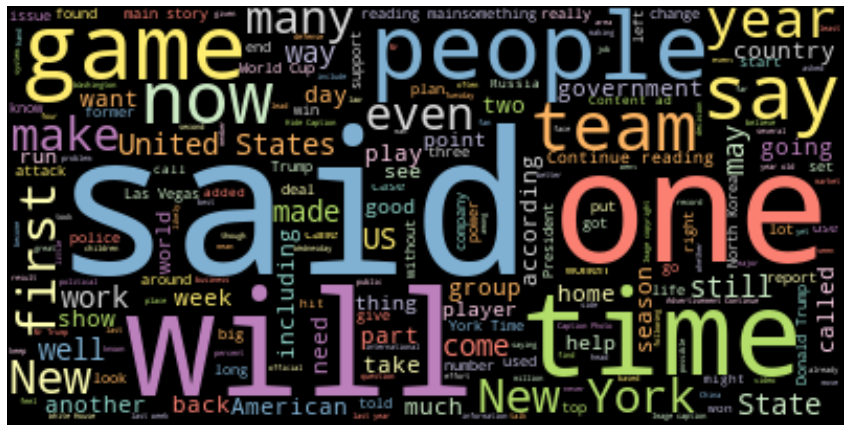

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.text.unique())
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Data Pre-Processing
1. Remove punctuation
2. Remove numbers
3. Remove tags
4. Remove urls
5. Remove stopwords
6. Change the news to lower case
7. Lemmatisation 

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**1. Remove Punctuations**

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))


**2. Remove numbers**

In [ ]:
def remove_numbers(text):
    return re.sub('[0-9]+','',text)

**3. Remove tags**

In [ ]:
def remove_tags(text):
  return re.sub('<.*?>'," ",text)

**4. Remove urls**

In [ ]:
def remove_urls(text):
  return re.sub('https?:\S+','',text)

**5. Remove stopwords & 6. Convert to lowercase**

In [ ]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

**7.  Lemmatisation**

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  lemmas = []
  for word in text.split():
    lemmas.append(lemmatizer.lemmatize(word))
  return " ".join(lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['text'] = df['text'].replace(np.nan, '')
df['text'] = df['text'].map(remove_urls)
df['text'] = df['text'].map(remove_punctuation)
df['text'] = df['text'].map(remove_tags)
df['text'] = df['text'].map(remove_numbers)

In [ ]:
df['text'] = df['text'].map(remove_stopwords)
df['text'] = df['text'].map(lemmatize_words)

**Tokenizing & Padding**


In [ ]:
df.head(10)


,URLs,Headline,text,label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,image copyright getty image sunday morning don...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,london reuters “last flag flying” comedydrama ...,1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,feud broke public view last week mr corker sai...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,mexico city reuters egypt’s cheiron holding li...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,country singer jason aldean performing la vega...,1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,jetnation fanduel league week reader think sto...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,kansa lawmaker led gov sam brownback republica...,1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",reserve bank india rbi governor urjit patel at...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,scott pruitt administrator u environmental pro...,1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,file photo air berlin sign seen air berlin sto...,1


In [ ]:
count_zero = (df['label']==0).sum()
count_one = (df['label']==1).sum()
print("No. of zero labels: ", count_zero)
print("No. of one labels: ", count_one)

No. of zero labels:  2137
No. of one labels:  1872


In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
x = df['text'].values
y= df['label'].values
print(x)
print(y)
print(x.shape)
print(y.shape)

['image copyright getty image sunday morning donald trump went twitter tirade member party isnt exactly huge news far first time president turned rhetorical cannon rank time however attack particularly biting personal essentially called tennessee senator bob corker chair powerful senate foreign relation committee coward running reelection said mr corker begged president endorsement refused give wrongly claimed mr corker support iranian nuclear agreement political accomplishment unlike colleague mr corker free worry immediate political future didnt hold tongue skip twitter post senbobcorker shame white house become adult day care center someone obviously missed shift morning — senator bob corker senbobcorker october report wasnt end though spoke new york time really let president four choice quote tennessee senator interview time particularly damning dont know president tweet thing true know everyone know cant really sugarcoat one mr corker flatout saying president liar everyone know se

**TOKENIZATION & RESTRICTING THE LENGTH OF THE TEXT**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)


In [ ]:
x

array(['image copyright getty image sunday morning donald trump went twitter tirade member party isnt exactly huge news far first time president turned rhetorical cannon rank time however attack particularly biting personal essentially called tennessee senator bob corker chair powerful senate foreign relation committee coward running reelection said mr corker begged president endorsement refused give wrongly claimed mr corker support iranian nuclear agreement political accomplishment unlike colleague mr corker free worry immediate political future didnt hold tongue skip twitter post senbobcorker shame white house become adult day care center someone obviously missed shift morning — senator bob corker senbobcorker october report wasnt end though spoke new york time really let president four choice quote tennessee senator interview time particularly damning dont know president tweet thing true know everyone know cant really sugarcoat one mr corker flatout saying president liar everyone k

In [ ]:
word_to_index = tokenizer.word_index
x = tokenizer.texts_to_sequences(x)

In [ ]:
word_to_index

In [ ]:
vocab_size =  len(word_to_index)
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 100

In [ ]:
vocab_size

53763

**PADDING THE SEQUENCES**

In [ ]:
from keras.preprocessing.sequence import pad_sequences

x = pad_sequences(x, maxlen=max_length)

print(x[0])

[ 1773   660    98     7   687    49   463   274 20753   355   194  2550
 15458   687  3810  1201    17    18   319  2288   160    16    51   565
    66  3593   466  3593   284  4441   656   819     8    17    18   410
  8790   490    11  2549  1117   374   345  3374   130  4783  6666   140
  1509   206   830   180  4139  2152   368  3558  5939   384   642  1624
  2102  3321 20754  3032  8394  7412  4217   679    90   250  1069  5006
  1066   693   512    24 24802  2214   136 24803   345  1075     1    78
    17    18  1219  2807  1202 34675 17300  1386    24   208  7698   169
    48   918 10275     3   236   277    17   802  2248  2387  1118  1219
    21  1884  2957   377    17    18   849  2195   279  1339    67   105
   172   451    31   143   100   572   382  2871  1118  1124  1440   424
  2872 20755    25  1706  9192 34676   295  3924  2007    24    17    18
    56 34677  3764 34678   143  4140  1741  4347    17  2872  2074  3765
   445 13853 24804  7142  3374 17301 24805    40   

**VECTORIZATION & GLoVE EMBEDDINGS FOR PADDED SEQUENCES**

In [ ]:
word_to_index.items()

dict_items([('said', 1), ('one', 2), ('u', 3), ('–', 4), ('new', 5), ('would', 6), ('year', 7), ('time', 8), ('game', 9), ('also', 10), ('state', 11), ('two', 12), ('first', 13), ('like', 14), ('week', 15), ('people', 16), ('mr', 17), ('trump', 18), ('last', 19), ('news', 20), ('say', 21), ('get', 22), ('could', 23), ('president', 24), ('photo', 25), ('—', 26), ('world', 27), ('make', 28), ('team', 29), ('story', 30), ('day', 31), ('back', 32), ('government', 33), ('may', 34), ('season', 35), ('many', 36), ('even', 37), ('source', 38), ('right', 39), ('image', 40), ('going', 41), ('player', 42), ('play', 43), ('company', 44), ('take', 45), ('told', 46), ('country', 47), ('way', 48), ('home', 49), ('three', 50), ('think', 51), ('still', 52), ('it’s', 53), ('since', 54), ('united', 55), ('go', 56), ('national', 57), ('york', 58), ('made', 59), ('see', 60), ('yard', 61), ('work', 62), ('point', 63), ('police', 64), ('american', 65), ('good', 66), ('know', 67), ('need', 68), ('much', 69), 

In [ ]:
embeddings_index = {};
with open('/content/drive/MyDrive/DATASET/glove.6B.100d.txt') as f:
    for line in f:
        #print(line)
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        #print(coefs)
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
embeddings_matrix.shape

(53764, 100)

**TRAIN VALIDATION AND TEST SPLIT in 60:20:20 as given in paper**



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

2405
802
802


In [ ]:
dropout = 0.2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional, TimeDistributed
from keras.callbacks import EarlyStopping

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False)
# ])
# model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(dropout))
# model.add(Dense(units = 256, activation = 'relu'))
# model.add(Dropout(dropout))

# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()

**DEEP LEARNING USING LSTM**


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False)
])
model.add(LSTM(100))
model.add(Dropout(dropout))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(dropout))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5376400   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 256)               25856     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5,482,913
Trainable params: 106,513
Non-tr

**TRAIN MODEL**

In [ ]:
epochs = 20
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val,y_val),batch_size=128)

Epoch 1/20
19/19 [==============================] - 20s 861ms/step - loss: 0.5295 - accuracy: 0.7459 - val_loss: 0.3318 - val_accuracy: 0.8603
Epoch 2/20
19/19 [==============================] - 19s 1s/step - loss: 0.2489 - accuracy: 0.8973 - val_loss: 0.2046 - val_accuracy: 0.9277
Epoch 3/20
19/19 [==============================] - 16s 836ms/step - loss: 0.1608 - accuracy: 0.9410 - val_loss: 0.1913 - val_accuracy: 0.9414
Epoch 4/20
19/19 [==============================] - 16s 852ms/step - loss: 0.1269 - accuracy: 0.9576 - val_loss: 0.1744 - val_accuracy: 0.9377
Epoch 5/20
19/19 [==============================] - 16s 841ms/step - loss: 0.1001 - accuracy: 0.9659 - val_loss: 0.1665 - val_accuracy: 0.9464
Epoch 6/20
19/19 [==============================] - 16s 842ms/step - loss: 0.0805 - accuracy: 0.9726 - val_loss: 0.1765 - val_accuracy: 0.9489
Epoch 7/20
19/19 [==============================] - 18s 928ms/step - loss: 0.0738 - accuracy: 0.9767 - val_loss: 0.1909 - val_accuracy: 0.9464
Ep

In [ ]:
result = model.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

26/26 [==============================] - 2s 77ms/step - loss: 0.2126 - accuracy: 0.9564
[+] Accuracy: 95.64%


**SAVING THE PRETRAINED MODEL USING PICKLE**

In [ ]:
import pickle


In [ ]:
pickle.dump(model, open("/content/drive/MyDrive/DATASET/LSTM2", "wb"))

INFO:tensorflow:Assets written to: ram://d56eba33-b20e-490c-ba39-9f7f1f1a2ff3/assets


In [ ]:
with open("/content/drive/MyDrive/DATASET/LSTM2" , 'rb') as f:
    lr = pickle.load(f)

**ACCURACY CALCULATION ON TEST DATA(20% of total data)**

In [ ]:
result = lr.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

26/26 [==============================] - 2s 76ms/step - loss: 0.2126 - accuracy: 0.9564
[+] Accuracy: 95.64%


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ndcg_score

In [ ]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
y_pred = np.where(p_pred > 0.5, 1, 0)

y_pred

[1.   0.   0.42 0.   1.   0.   1.   0.   0.   0.   0.12 1.   0.67 1.
 1.   0.   0.   0.   0.   1.   1.   1.   0.16 0.   1.   0.   1.   0.
 0.   1.   1.   0.   0.   1.   1.   1.   1.   0.   1.   1.   0.72 0.
 0.44 0.   0.   0.   0.   1.   0.   1.   1.   1.   0.   0.   1.   0.
 0.   0.   1.   1.   0.   0.   1.   0.   0.   0.   1.   0.   0.   1.
 0.   0.   0.   1.   1.   1.   1.   1.   0.37 0.84 1.   0.   0.   1.
 0.   1.   1.   0.   0.   0.   0.04 0.   0.   1.   1.   1.   0.   0.
 1.   0.   1.   0.   1.   1.   1.   1.   0.   0.   1.   0.   1.   0.
 0.   1.   1.   0.03 1.   0.   1.   0.   0.   0.   1.   1.   0.06 0.
 1.   0.   0.   0.   1.   1.   0.   0.   0.   1.   0.   0.   1.   1.
 0.12 0.   1.   0.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.
 1.   0.02 0.   0.   0.33 0.   0.   0.   1.   1.   0.99 0.   1.   1.
 0.   1.   1.   0.   1.   0.   1.   0.   0.   0.   1.   1.   0.   0.
 0.   1.   0.   1.   1.   0.95 0.   0.   0.   0.   0.   1.   0.2  1.
 0.   0.   0.   0.02 0.   1.   1. 

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

In [ ]:
len(y_pred)

802

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[408  13]
 [ 22 359]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       421
           1       0.97      0.94      0.95       381

    accuracy                           0.96       802
   macro avg       0.96      0.96      0.96       802
weighted avg       0.96      0.96      0.96       802



In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

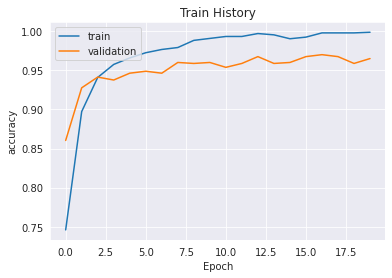

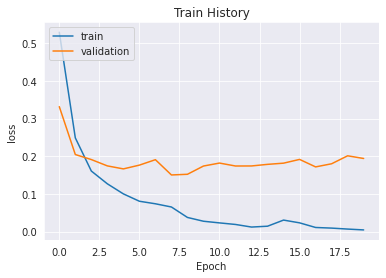

In [ ]:
show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

In [ ]:
text = [""]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
word_to_index = tokenizer.word_index
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, maxlen=max_length)
y = model.predict(text)
if y>=0.5:
    print("FAKE")
else:
    print("REAL")

REAL
